# Computational Text Analysis (LATIS/Libraries), Spring 2020

## Intro
lorem ipsum

### Strings
To work with text in Python it's important to be able to manipulate string variables. Let's create a variable called text_string and print it as output.

In [2]:
text_string = 'Hi there'
print(text_string)

Hi there


We can check what kind of a variable this is by using the built-in type() function in Python.

In [3]:
type(text_string)

str

We can refer to specific characters in the string by slicing it using brackets:

In [4]:
print(text_string[0])

H


In [5]:
text_string[1]

'i'

In [6]:
text_string[0:3]

'Hi '

In [7]:
text_string[3:]

'there'

We can also 'add' or *concatenate* strings together using the plus sign.

In [8]:
text_string + '!'

'Hi there!'

In [9]:
text_string += '!'

In [10]:
text_string + ' ' + 'How are you today?'

'Hi there! How are you today?'

Note that since we didn't save the concatentations above to a variable the original text_string is unchanged.

In [11]:
len(text_string)

9

### Built-in string methods
Strings also have built-in methods that can operate on them. These include *join*, *find*, *replace*, *lower* and *upper*

In [12]:
how_string = 'How are you today, Mike?'
how_string.replace('H', 'C')

'Cow are you today, Mike?'

In [13]:
how_string.replace('are you today', 'were you yesterday')

'How were you yesterday, Mike?'

In [14]:
how_string.lower()

'how are you today, mike?'

In [15]:
how_string.upper()

'HOW ARE YOU TODAY, MIKE?'

In [16]:
'x'.join(how_string)

'Hxoxwx xaxrxex xyxoxux xtxoxdxaxyx,x xMxixkxex?'

### Reading files

Usually you want to work with text from files though, and not manually create string variables. 

The first step is to read in the files containing the data. Common file types for text data are: 
* `.txt`
* `.csv`
* `.json`
* `.html` 
* `.xml`

Each file format requires specific Python tools or methods to read, but for our case, we'll be working with .txt files.

#### Reading in `.txt` files

Python has built-in support for reading in `.txt` files.

Let's take a look at the first file in our directory (folder) of State of the Union addresses (`/sotu_text`):

In [17]:
# create a new variable called file1 and read ("r") the first file in the sotu_text folder
file1 = open("sotu_text/215.txt","r") 

In [18]:
# but when we print the variable, it's not yet stored as a string
type(file1)

_io.TextIOWrapper

In [19]:
# to view the text, let's read in the file1 object to a new variable called "text" using .read() and then print out the first250 characters
text = file1.read()

In [20]:
print(text[0:250])

Mr. President, Mr. Speaker, Members of the 104th Congress, my fellow Americans: Again we are here in the sanctuary of democracy, and once again our democracy has spoken. So let me begin by congratulating all of you here in the 104th Congress and cong


### Tokenization

Once we've read in the data, a common next step is to split a longer string into words. This step is referred to as "tokenization". That's because each occurrence of a word is called a "token". Each distinct word used is called a word "type". So the word type "the" may correspond to multiple tokens of "the" in a text.

#### Tokenizing by whitespace
Let's save each word to a list variable called 'tokens'

In [21]:
# use the split() function to split the text variable up by whitespace into a tokens list
tokens = text.split()

In [22]:
# what kind of a variable is tokens?
type(tokens)

list

### Lists 
You can view each item in a Python list using the same syntax we used above to slice a str variable. The first item in the tokens list is at ```tokens[0]``` and the second is ```tokens[1]```. You can view a range of the first 10 as follows:

In [23]:
tokens[0:10]

['Mr.',
 'President,',
 'Mr.',
 'Speaker,',
 'Members',
 'of',
 'the',
 '104th',
 'Congress,',
 'my']

In [24]:
# the first one
tokens[0]

'Mr.'

In [25]:
# the last ten
tokens[-10:]

['still', 'to', 'come.', 'Thank', 'you,', 'and', 'God', 'bless', 'you', 'all.']

In [26]:
# Note: you can also slice the string variables stored inside of a list
tokens[1][0:5]

'Presi'

### Sentence segmentation

Sentence segmentation involves identifying the boundaries of sentences, and provides a different way to tokenize our text.

#### Sentence segmentation by splitting on punctuation

In [27]:
# instead of the default whitespace for split(), you can identify the character or characters you'd like to split on
sentences = text.split('.')
sentences[0]

'Mr'

We can check how many items are in any list using the len() function.

In [28]:
len(sentences)

467

In [29]:
# note that this method doesn't break out sentences that end with other punctuation, like question marks
sentences[35]

' What are we to do about it? \n\nMore than 60 years ago, at the dawn of another new era, President Roosevelt told our Nation, "New conditions impose new requirements on Government and those who conduct Government'

### Regular Expressions
We could improve on this by using regular expressions. They allow us to split strings using specific characters or patterns that match different *kinds* of characters. Regex is a very powerful tool, but we won't go into it much today. For help figuring out and working with regular expressions we recommend https://regex101.com/

In [30]:
import re

In [31]:
# this pattern matches periods, question marks, or exclamation marks
boundary_pattern = r'[.?!]'
sentences_re = re.split(boundary_pattern, text)

In [32]:
# there are now a few more sentences in our list
len(sentences_re)

474

In [33]:
# and this sentence ends at the question mark
sentences_re[35]

' What are we to do about it'

### Strip whitespace

This is an extremely common step in text cleaning. It's simple to perform and nicely pre-packaged in Python. It's particularly common for user-generated text (think survey forms).

In [34]:
string = " Hi there! "
string

' Hi there! '

In [35]:
string.strip()

'Hi there!'

We can also use ```strip()``` to remove "line breaks" from strings. Line breaks are often represented with "escape characters" such as ```\n``` in text files.

In [36]:
text[-25:]

' and God bless you all.\n\n'

In [37]:
# we can remove whitespace at the beginning and end of a string using .strip()
stripped_text = text.strip()
stripped_text[-25:]

'u, and God bless you all.'

You can also run more complex find/replace patterns using regex. Here we use ```re.sub()``` to match any \s+ characters with a single space.

In [38]:
# we can use regular expressions to remove whitespace throughout the string
# note that we are replacing any of the matching whitespace patterns with a single space ' '.
whitespace_pattern = r'\s+'
clean_text = re.sub(whitespace_pattern, ' ', text)
clean_text[-25:]

', and God bless you all. '

### Text normalization
Text normalization can help us clean our text to fit some standard patterns. One common normalization step is to remove case from the text.

If you want to count the frequencies of words, for example, using lower case will ensure you don't count "Death" and "death" as two separate words.

In [39]:
caps_string = "Hi There! Can you believe it's 2020?"
caps_string.lower()

"hi there! can you believe it's 2020?"

In [40]:
clean_text = clean_text.lower()
clean_text[0:250]

'mr. president, mr. speaker, members of the 104th congress, my fellow americans: again we are here in the sanctuary of democracy, and once again our democracy has spoken. so let me begin by congratulating all of you here in the 104th congress and cong'

Depending on your analysis, you might also want to throw out numerals.

In [41]:
# remove digits using regex
digits = r'\d+'
re.sub(digits, '', caps_string)

"Hi There! Can you believe it's ?"

In [42]:
# note that since we didn't assign the changes to the string variable, the changes aren't "saved"
caps_string

"Hi There! Can you believe it's 2020?"

#### Removing punctuation

Sometimes you might want to keep only the alphanumeric characters (the letters and numbers) and ditch the punctuation. Here's how we can do that.


In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
# strip() will remove punctuation from the beginning or end of the string
caps_string.strip(string.punctuation)

"Hi There! Can you believe it's 2020"

The following code looks a little complex, but essentially it will move through each character in our ```caps_string``` variable, and replace any punctuation mark from our ```string.punctuation``` list with a blank string, ```''```

In [45]:
# this code will return all punctuation from the caps_string variable string
''.join(word.strip(string.punctuation) for word in caps_string)

'Hi There Can you believe its 2020'

In [46]:
# let's remove punctuation from our SOTU speech
clean_text = ''.join(word.strip(string.punctuation) for word in clean_text)

### List comprehension

This is what is called a *comprehension* in Python. A way to iterate or loop over multiple similar items, perform a task, and capture the result of that task for each of the items in a single object. It is very consise, and a powerful way to think about repetitive tasks, like text cleaning.

They're easiest to understand by going backwards from the loop and conditions and then seeing what is done to them.

So first, we're looping over each item (which we're calling *word* in the list *clean_text*:
Then, we're running the .strip() method on that item and stripping all punctuation as listed in string.punctuation

In [47]:
# as a for-loop, this would look like the following, but the output wouldn't be saved
for word in clean_text:
    word.strip(string.punctuation)

In [48]:
# as a list comprehension, we can capture the output into a single list
output = [word.strip(string.punctuation) for word in clean_text]
output[0:10]

['m', 'r', ' ', 'p', 'r', 'e', 's', 'i', 'd', 'e']

Lastly, we want that result as a single string, rather than a list of separate words, so we're using some Python slight of hand to make that happen: we're joining, or concatenating each item of that list to an empty string

In [49]:
''.join(output)

'mr president mr speaker members of the 104th congress my fellow americans again we are here in the sanctuary of democracy and once again our democracy has spoken so let me begin by congratulating all of you here in the 104th congress and congratulating you mr speaker if we agree on nothing else tonight we must agree that the american people certainly voted for change in 1992 and in 1994 and as i look out at you i know how some of you must have felt in 1992 laughter i must say that in both years we didnt hear america singing we heard america shouting and now all of us republicans and democrats alike must say we hear you we will work together to earn the jobs you have given us for we are the keepers of a sacred trust and we must be faithful to it in this new and very demanding era over 200 years ago our founders changed the entire course of human history by joining together to create a new country based on a single powerful idea we hold these truths to be selfevident that all men are cr

We're also overwriting the clean_text with the puctuation-stripped string, which is why you see that same variable on both the left and the right hand of the equals.

In [50]:
clean_text = ''.join(word.strip(string.punctuation) for word in clean_text)

#### Remove anything but letters
We can use a regular expression that matches only upper and lower case letters to remove everything else.

In [51]:
# in this case we sub any non-letter characters out with a space, ' '
letters_only = r'[^A-Za-z]+'
re.sub(letters_only, ' ', caps_string)

'Hi There Can you believe it s '

### Tokenizing with the Natural Language Toolkit (NLTK)

We can also use the Natural Language Toolkit (NLTK) to accomplish many of the steps we showed manually above. Or in the case of our clean_text variable, where we've already removed punctuation, we can use the word_tokenize module to break the text up into its consitutent tokens:

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
tokens = word_tokenize(clean_text)
tokens[:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 'of',
 'the',
 '104th',
 'congress',
 'my']

In [54]:
from nltk.probability import FreqDist

Now that we have a list of tokens we can count their frequencies in the speech. Let's use a builtin NLTK function called FreqDist() to look at our most common words.

In [55]:
#apply the FreqDist function to our tokens variable
fdist = FreqDist(tokens)

#fdist is a dictionary of unique words and the number of times they occur
fdist

FreqDist({'the': 463, 'to': 401, 'and': 348, 'of': 231, 'we': 203, 'in': 180, 'a': 179, 'our': 140, 'that': 133, 'for': 113, ...})

### Dictionaries
A Python dictionary is a way to hold an unordered list of items, using something called a 'key:value' pair. Above you can see the list of keys (tokens) and values (word counts) from the FreqDist dictionary. A good way to differentiate a Python dictionary from a Python list is to look at the brackets used:

* ```{}``` curly brackets for dictionaries
* ```[]``` square brackets for lists

In [56]:
#it also includes a handy method to find the most common words 
fdist.most_common(10)

[('the', 463),
 ('to', 401),
 ('and', 348),
 ('of', 231),
 ('we', 203),
 ('in', 180),
 ('a', 179),
 ('our', 140),
 ('that', 133),
 ('for', 113)]

#### Removing stop words

You might have noticed that the most common words above aren't terribly exciting. They're words like "am", "i", "the" and "a": stop words. These are rarely useful to us in computational text analysis, so it's very common to remove them completely.

NLTK includes a stopwords module we can use. Not all stopwords lists are equal though: for your own research you might want to customize a stopwords list, or find one that is best-suited to your domain.

In [57]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# how many stopwords are on the list?
len(stop)

179

In [58]:
# what are the first ten word on the stopword list?
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Let's create a new list of tokens, removing our stopwords along the way. 

This loop checks each word in our original tokens list, and if it does *not* appear on the stopword list, it adds it to a new list called tokens_clean.

In [59]:
tokens_clean = [] 
  
for w in tokens: 
    if w not in stop: 
        tokens_clean.append(w)
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [60]:
# advanced we can do the same thing quite efficiently with a list comprehension
tokens_clean = [w for w in tokens if w not in stop]
tokens_clean[0:10]

['mr',
 'president',
 'mr',
 'speaker',
 'members',
 '104th',
 'congress',
 'fellow',
 'americans',
 'sanctuary']

In [61]:
# now we can re-count the most common words after stop words are removed
freq = FreqDist(tokens_clean)
freq.most_common(10)

[('people', 72),
 ('work', 42),
 ('new', 41),
 ('us', 37),
 ('government', 34),
 ('country', 32),
 ('years', 29),
 ('year', 29),
 ('last', 28),
 ('time', 27)]

Hmmm, still not terribly interesting but getting better...

#### Stemming

Stemming and lemmatization both refer to remove morphological affixes on words. For example, if we stem the word "grows", we get "grow". If we stem the word "running", we get "run". We do this because often we care more about the core content of the word (i.e. that it has something to do with growth or running, rather than the fact that it's a third person present tense verb, or progressive participle).

NLTK provides many algorithms for stemming. For English, a great baseline is the [Porter](https://github.com/nltk/nltk/blob/develop/nltk/stem/porter.py) algorithm.

In [62]:
# import the PorterStemmer and then stem the word "states" as an example
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('states')

'state'

In [63]:
stemmer.stem('united')

'unit'

In [64]:
stemmer.stem('government')

'govern'

In a similar manner as the stopwords loop above, we can create a new list of stemmed tokens:

In [65]:
tokens_stemmed = []
for t in tokens_clean:
    tokens_stemmed.append(stemmer.stem(t))

In [66]:
#or as a comprehension:
tokens_stemmed = [stemmer.stem(t) for t in tokens_clean]

In [67]:
tokens_stemmed[0:10]

['mr',
 'presid',
 'mr',
 'speaker',
 'member',
 '104th',
 'congress',
 'fellow',
 'american',
 'sanctuari']

Now that the words are stemmed, are the most common words any different? 

Here are the stemmed top ten.

In [68]:
freq_stemmed = FreqDist(tokens_stemmed)
for f in freq_stemmed.most_common(10):
    print(f)

('peopl', 72)
('work', 69)
('year', 58)
('new', 41)
('american', 40)
('govern', 39)
('us', 37)
('countri', 34)
('cut', 32)
('let', 30)


And the unstemmed top ten:

In [69]:
for f in freq.most_common(10):
    print(f)

('people', 72)
('work', 42)
('new', 41)
('us', 37)
('government', 34)
('country', 32)
('years', 29)
('year', 29)
('last', 28)
('time', 27)


Similar, but with some important differences. Notice that "work" went from 42 to 69 after stemming.  

Why would that be?

### Reading in multiple files

Often, our text data is split across multiple files in a folder. We can read them all into a single variable using a Python tool called glob.

In [70]:
import glob

In [71]:
# save all of the files that end with .txt in the sotu_text/ folder to a variable called sotu_all
sotu_all = glob.glob("sotu_text/*.txt")

In [72]:
# this just saves the file-paths to a list though
sotu_all[0:10]

['sotu_text/060.txt',
 'sotu_text/074.txt',
 'sotu_text/048.txt',
 'sotu_text/114.txt',
 'sotu_text/100.txt',
 'sotu_text/128.txt',
 'sotu_text/129.txt',
 'sotu_text/101.txt',
 'sotu_text/115.txt',
 'sotu_text/049.txt']

Those are out of order though. Let's sort the list so that the list index is in the same order as the speeches themselves (sotu_all[0] would equal 001.txt).

In [73]:
sotu_all.sort()

In [74]:
sotu_all[0:10]

['sotu_text/001.txt',
 'sotu_text/002.txt',
 'sotu_text/003.txt',
 'sotu_text/004.txt',
 'sotu_text/005.txt',
 'sotu_text/006.txt',
 'sotu_text/007.txt',
 'sotu_text/008.txt',
 'sotu_text/009.txt',
 'sotu_text/010.txt']

Now that we have a list of all the files we need to cycle through each one and save the text from the file.

To do that we'll create a new list variable, speeches. For each file in the sotu_all variable we'll open and read the file, and save the text to the speeches list. 

In [75]:
speeches = []
for speech in sotu_all:
    s = open(speech, 'r')
    text = s.read()
    speeches.append(text)

In [76]:
# now we can refer to each speech from the list using the list index
speeches[45][0:250]

'\n\n Fellow Citizens of the Senate and of the House of Representatives: \n\nIn performing my duty at the opening of your present session it gives me pleasure to congratulate you again upon the prosperous condition of our beloved country. Divine Providenc'

In [77]:
#which file is that?
sotu_all[45]

'sotu_text/046.txt'

Here's a short function to tidy the open/append loop.

In [78]:
speeches = [open(speech, 'r').read() for speech in sotu_all]

In [79]:
len(speeches)

236

In [80]:
speeches[235][0:250]

"Thank you. Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans: Tonight marks the eighth year that I've come here to report on the State of the Union. And for this final one, I'm going to try to make it a little shorter. I know "

# Part 2
## Functions
Now that we have all the text data loaded, we can think about working on the corpus as a whole.

Let's create a function that combines all of our cleaning protocols so that we can clean each State of the Union speech with a single piece of code. 

The function definition opens with the keyword ```def``` followed by the name of the function (clean_speech) and a parenthesized list of parameter names (speech). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the return value.

In [81]:
def clean_speech(speech):
    speech = ''.join(word.strip(string.punctuation) for word in speech.lower())
    speech = [stemmer.stem(w) for w in word_tokenize(speech) if w not in stop]
    return speech

You can call the function using the name of the function, and the variable you'd like to process as its parameter. To process only the first speech, for example, you could call:

```clean_speech(speeches[0])```

You could also assign the function's output to a variable so you can work with it later:

```first_cleaned = clean_speech(speeches[0])```

Let's put it all together and clean all of the speeches, and assign them to a new list, ```cleaned_speeches```.

In [82]:
cleaned_speeches = [clean_speech(speech) for speech in speeches]

In [83]:
len(cleaned_speeches)

236

Notice that each item in the cleaned_speeches list is also a list.

In [84]:
type(cleaned_speeches[0])

list

### Word Frequencies with ConditionalFreqDist()

In [150]:
import nltk
cfd = nltk.ConditionalFreqDist()

### Matplotlib
We can use a tool called matplotlib to help visualize some of our results. NLTK uses matplotlib as the engine for their .plot() function, but let's install it here and also run some Jupyter "magic" to make sure the matplotlib visualizations appear inline (in the display) of our Jupyter view.

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

#### enumerate()
* The built-in enumerate() function allows us to keep a count of our place in a for loop, and to reference the enumerate variable later on. We'll call our enumerate variable 'i' for index. 
* The first for-loop iterates through each speech in cleaned_speeches
* The second for-loop iterates through each word in the speech at hand.
* We'll unpack the ```cfd['americ'][i]+=1``` code a bit more later on, but note for now that ```+=1``` counts each occurence of any word that starts with 'americ' and ```[i]``` refers to the speech index. 

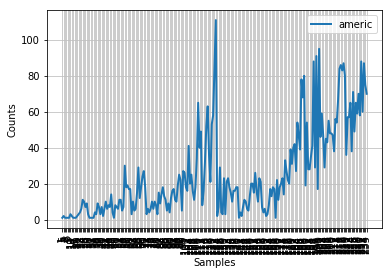

In [151]:
for i,speech in enumerate(cleaned_speeches):
    for w in speech:
        if w.startswith('americ'):
            cfd['americ'][i]+=1            
cfd.plot()

Let's take a closer look at the cfd object. 

In [98]:
cfd

<ConditionalFreqDist with 2 conditions>

In [99]:
type(cfd)

nltk.probability.ConditionalFreqDist

If we take a look at the cfd.items() we see a dictionary - contained by curly brackets {}  - that contain a couple of numbers, all of which correspond to the dict_key of 'americ'. We assigned that key in our loop when we referred to ```cfd['americ']```.

In [154]:
cfd.items()

dict_items([('americ', FreqDist({123: 111, 200: 95, 198: 91, 196: 88, 231: 88, 218: 87, 233: 87, 216: 86, 122: 85, 215: 84, ...}))])

We can view the dict_item key:

In [156]:
cfd.keys()

dict_keys(['americ'])

But note that the cfd dict_key ['americ'] is a FreqDist object. Within FreqDist() there's a regular Python dictionary.

In [159]:
cfd['americ']

FreqDist({123: 111, 200: 95, 198: 91, 196: 88, 231: 88, 218: 87, 233: 87, 216: 86, 122: 85, 215: 84, ...})

We can then hone in on a specific key from the dictionary that is inside FreqDist, by again calling the key name - which we assigned above to be the speech index. Inside the CFD loop ```cfd['americ'][i]+=1``` the ```[i]``` assigned each key to match the enumerate value, which was the speech index. So the following should show us the number of times words starting with 'americ' appear in the first speech in our corpus:    

In [160]:
cfd['americ'][0]

0

What about the 200th speech?

In [162]:
cfd['americ'][199]

17

It's hard to see from the plot above which specific speeches used the term the most. We can sort the cfd['americ'] dictionary by values to view the highest counts for 'americ'.

We can easily sort sets of values in Python using the sorted() method. Since our counts are the 'value' portion of the 'cfd['americ']' dictionary, with the index as they 'key', we'll want to specify we want to sort the values specifically. By default, Python sorts ascending, so we'll need to specify we want to 'reverse' the sort. Let's see who uses terms like 'america' and 'americans' the most!

In [163]:
sorted(cfd['americ'].values(), reverse=True)[:5]

[111, 95, 91, 88, 88]

You'll note that above we just get the frequencies of 'americ' terms appearing, rather than the index/key or identifier to know which speech that count occurs in. We can specify we want the identifier as follows.

In [164]:
sorted(cfd['americ'], key=cfd['americ'].get, reverse=True)[:5]

[123, 200, 198, 196, 231]

So now we know the speech at the index [123] has the highest count of 'americ' terms. Let's take a closer look.

In [165]:
# who says "americans" the most?
speeches[123][-250:]

' national improvements, and to submit a plan for their execution; and when the plan has been submitted and approved, and the work carried out, Washington will really become what it ought to be-the most beautiful city in the world.   WILLIAM H. TAFT\n\n'

### Detailed plotting
If we want more control over the plot, we can use MatPlotLib to set some parameters more specifically.

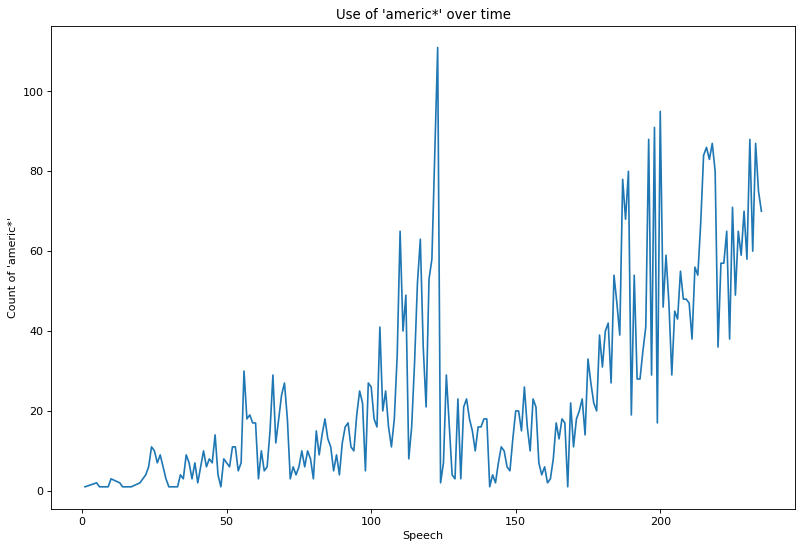

In [178]:
x_speech = list(cfd['americ'].keys())
y_count = list(cfd['americ'].values())
fig=plt.figure(figsize=(12, 8), dpi= 80)
plt.plot(x_speech, y_count)
plt.ylabel("Count of \'americ*\'")
plt.xlabel("Speech")
plt.title("Use of \'americ*\' over time")

plt.show()

## Challenge questions:
* What's suboptimal about the chart above? 
* How could we clean up this data to create a more meaningful chart? 
* What's missing in the data we're using here? 
* How could we visualize it better?

## Sentiment Analysis

Sentiment analysis is an exploratory data analysis technique that "seeks to quantify the emotional intensity of words and phrases within a text." (quote from the [Programming Historian SA tutorial](https://programminghistorian.org/en/lessons/sentiment-analysis))

We can use more NLTK tools to run a simple sentiment analysis on our SOTU corpus. We'll download the vader_lexicon for sentiment analysis and the Vader and Sentiment modules. Don't worry if you see a warning that we don't have the twython library. We won't be using that since we're not analyzing twitter text.

In [180]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/codyhennesy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Note that we could use a tokenizer that works best for sentiment analysis (see the commented out code below). Since we've already tokenized our text we'll stick with that corpus. 

In [ ]:
#nltk.download('punkt')
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

Let's initialize the vader SentimentIntensityAnalyzer and save it to a variable called sid.

In [181]:
sid = SentimentIntensityAnalyzer()

Now we can use the features of the sentiment analysis tool. You can take a look at some of those features by typing sid. and then tabbing through the options.

In [ ]:
#sid

First let's look at the 'polarity_scores' for a specific speech. For Sentiment analysis we don't need the cleaned speech, so we'll go back to our original speeches list.

polarity_scores will give us positive and negative scores. This feature is built into VADER and can be requested on demand.

In [182]:
scores = sid.polarity_scores(speeches[100])
scores

{'neg': 0.062, 'neu': 0.799, 'pos': 0.14, 'compound': 1.0}

### Dictionaries
We can format those by looping through the scores dictionary. Remember that dictionaries are key:value pairs stored in curly brackets. We can cycle through the scores dictionary like so: 

In [183]:
for key in sorted(scores):
    print('{0}: {1}'.format(key, scores[key]), end='\n')

compound: 1.0
neg: 0.062
neu: 0.799
pos: 0.14


Now let's look at the scores for the entire speeches corpus.
We'll create another dictionary, 'all_scores', that will use the speeches index as the key, and the scores as its value. Note that this means that the value for each item in 'all_scores' will contain *another* dictionary.

This might take a few minutes to run because it has to analyze all 235 speeches.

In [184]:
all_scores = {}
for idx, speech in enumerate(speeches):
    all_scores[idx] = sid.polarity_scores(speech)

Now we can take a look at the scores for specific speeches by referencing the index/key of all_scores:

In [185]:
all_scores[235]

{'neg': 0.094, 'neu': 0.735, 'pos': 0.17, 'compound': 0.9999}

We can look at a specific score by referencing the key within the scores dictionary. 

In [186]:
all_scores[235]['neg']

0.094

From here, we can list all of the negative scores for the corpus. 

To keep it somewhat simple, let's just create a new dictionary that will only contain negative scores. We can create an empty dictionary called negative, then cycle through each key:value item in the all_scores dictionary from above. For each item, we'll assign the index number as its key and the negative score as its value.

In [187]:
negative = {}
for score in all_scores.items():
    negative[score[0]] =  score[1]['neg']

We can use Matplotlib again here to plot out the negative scores for the entire corpus.

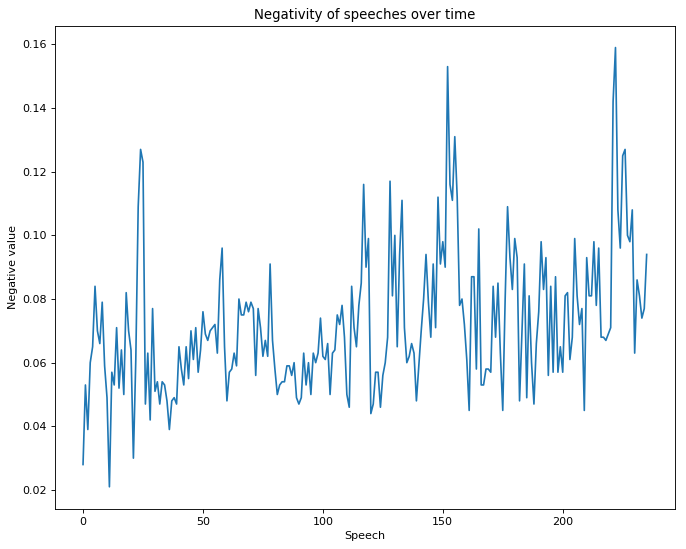

In [188]:
x_speech = list(negative.keys())
y_neg = list(negative.values())
fig=plt.figure(figsize=(10, 8), dpi= 80)
plt.plot(x_speech, y_neg)
plt.ylabel("Negative value")
plt.xlabel("Speech")
plt.title('Negativity of speeches over time')
plt.show()

#### Most negative speeches
The graph gives us a nice visualization of some overall trends, but it's hard to identify specific speeches here. We can just sort our dictionary, using the sorted() method we used above to look at the most negatively scored speeches in the corpus.

In [189]:
sorted(negative, key=negative.get, reverse=True)[:5]

[222, 152, 221, 155, 24]

In [190]:
speeches[222][0:500]

'Mr. Speaker, Vice President Cheney, Members of Congress, distinguished citizens and fellow citizens: Every year, by law and by custom, we meet here to consider the state of the Union. This year, we gather in this Chamber deeply aware of decisive days that lie ahead. \n\nYou and I serve our country in a time of great consequence. During this session of Congress, we have the duty to reform domestic programs vital to our country. We have the opportunity to save millions of lives abroad from a terribl'

#### Least negative speeches
We can use the default sort (ascending values) to view the least negative speeches in the corpus.

In [191]:
sorted(negative, key=negative.get)[:5]

[11, 0, 21, 2, 36]

## Topic Models

In topic models each document is represented as a distribution over topics, and each topic is represented as a distribution over words. 

Topic model algorithms require documents to be transformed into a document-term-matrix (DTM). In a DTM each row represents a document (for us, a SOTU speech), each column represents a specific word or token in the corpus, and the matrix contains the number of times each word appears in a given document. A document can be a tweet, a novel, or an entire corpus of an author's work. How you define the boundaries of a document makes a huge difference to the output of a topic model algorithm.

Let's consider two documents, each one sentence long: 

In [192]:
sentence_1 = "The brown fox jumped over the white cow."
sentence_2 = "The red hen ran away from the brown fox."
tokens_s1 = clean_speech(sentence_1)
tokens_s2 = clean_speech(sentence_2)
print(tokens_s1)
print(tokens_s2)

['brown', 'fox', 'jump', 'white', 'cow']
['red', 'hen', 'ran', 'away', 'brown', 'fox']


Here's how we would represent those two documents in a document-term-matrix, after stemming and throwing out stop words:

|brown | fox | jump | white | cow | red | hen | ran | away|
|--|--| --| --| --| --| --| --| --|
|1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0|
|1 | 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1|

## NEED DAVID TO INSTALL GENSIM IN THE HUB

### Gensim

Gensim is a popular Python library built specifically for topic modeling. While other popular data science libraries, such as scikit-learn, can be used for topic modeling, gensim has a lot of handy built-in features that will help us out.

In [ ]:
'''import sys
!{sys.executable} -m pip install gensim'''

In [193]:
import gensim
from gensim import corpora

Let's apply gensim to our cleaned_speeches corpus. 

First, we want to run the ```corpora.Dictionary()``` function from Gensim to create a dictionary of all of the terms in the corpus. Within the dictionary object is a long list of every unique word/token. In our case there are 23,662.

In [343]:
dictionary = corpora.Dictionary(cleaned_speeches)
print(dictionary)

Dictionary(23662 unique tokens: ['abroad', 'access', 'accord', 'add', 'adequ']...)


Also available within the gensim dictionary object, is a Python dictionary, ```.token2id```, that contains the unique terms from the tokens list as keys, and the values are an index for each term.

In [196]:
#dictionary.token2id

Next we want to convert the lists of tokens from cleaned_speeches to a bag-of-words model using the ```doc2bow()``` function. This bit of code uses list comprehension to cycle through every tokenized speech (here called 'text') in cleaned_speeches and apply the doc2.bow() function to it.

In [344]:
corpus = [dictionary.doc2bow(text) for text in cleaned_speeches]

The corpus doesn't look like much initially. Here are the first 20 items in a list for the first item/speech in the entire corpus. 

In [198]:
corpus[0][0:20]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 3),
 (10, 3),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1)]

The function doc2bow() counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector. So the above is a list of the first 20 token ids + counts from the first speech, corpus[0].

Say what?! Well, let's take a look at a simple example using a sentence from before.

In [199]:
print(tokens_s1)

['brown', 'fox', 'jump', 'white', 'cow']


In [200]:
new_vec = dictionary.doc2bow(tokens_s1)
print(new_vec)

[(2114, 1), (3195, 1), (4061, 1), (14099, 1), (22251, 1)]


Since we're using the dictionary object for the cleaned_speeches corpus still, the first number in each pair above — ```(2114,1)``` - refers to the id for that token in the dictionary from cleaned_speeches. The second number refers to the number of times it occurs in our tokens list *tokens_s1*.

If we want to save our corpus and dictionary objects to work with later, we can do the following:

In [220]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### LDA topic models
Now let's use gensim to create an LDA (Latent Dirichlet Allocation) topic model with our corpus.

LDA on a large-ish corpus like ours will take a little while to run since it uses machine learning to iterate over the corpus in many different passes, adjusting its findings as it "learns" what topics "fit."

Topic models require us to set the number of topics ahead of time. Let's just start with a guess that there are about 15 topics in the corpus.

In [347]:
n_topics = 15

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = n_topics, id2word=dictionary, alpha='auto',
    eta='auto', passes=20)

Now we have the model, but LDA doesn't actually tell us what topics are called. It doesn't actually understand a topic at all, that's our job. What it can tell us is which words are most strongly associated with each topic. From there we might see clear patterns and label the topics as we like. 

Here we use the print_topics() function, which takes an argument for how many words per topic we want to see, and cycle through each topic to view the associated words, along with their "prevalence" score to the topic. 

In [348]:
topics = ldamodel.print_topics(num_words = 10)
for topic in topics:
    print(topic, '\n')

(0, '0.011*"american" + 0.011*"year" + 0.011*"america" + 0.009*"peopl" + 0.008*"work" + 0.007*"us" + 0.007*"new" + 0.007*"must" + 0.007*"make" + 0.006*"help"') 

(1, '0.013*"year" + 0.011*"program" + 0.009*"nation" + 0.008*"feder" + 0.008*"congress" + 0.007*"new" + 0.007*"develop" + 0.007*"administr" + 0.006*"increas" + 0.006*"continu"') 

(2, '0.007*"govern" + 0.007*"upon" + 0.007*"nation" + 0.007*"peopl" + 0.006*"great" + 0.006*"state" + 0.005*"us" + 0.005*"make" + 0.005*"busi" + 0.004*"must"') 

(3, '0.007*"year" + 0.006*"bank" + 0.006*"1894" + 0.004*"allot" + 0.003*"1893" + 0.003*"ship" + 0.003*"amount" + 0.003*"agricultur" + 0.003*"secretari" + 0.003*"circul"') 

(4, '0.008*"nation" + 0.008*"law" + 0.007*"govern" + 0.006*"state" + 0.006*"would" + 0.006*"upon" + 0.005*"great" + 0.005*"men" + 0.005*"work" + 0.005*"countri"') 

(5, '0.019*"war" + 0.008*"nation" + 0.007*"must" + 0.007*"men" + 0.006*"peac" + 0.006*"forc" + 0.006*"one" + 0.005*"enemi" + 0.005*"year" + 0.005*"peopl"') 



Wow, those topics are pretty repetitive! How can we improve these?

Seems like we might want to remove more words from our corpus since the most common words (state, nation, govern...) show up over and over here. We could go back and manually add those stop words to our stop word list, but we have an easier option: we can modify our gensim dictionary with a filter to remove the *n* most frequent terms. Let's try to remove the most common 25 words.

In [350]:
dictionary.filter_n_most_frequent(25)

# since we've updated the dictionary we have to re-assign the corpus
corpus = [dictionary.doc2bow(text) for text in cleaned_speeches]

#### Coherence
Before we run the new model though, we can also use a tool in gensim that will score the "coherence" of topic models. We can use that tool to test different numbers of topics and see which performs best.

For the function below, we used the code from this [web tutorial](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python#17howtofindtheoptimalnumberoftopicsforlda), subbing out our LdaModel() instead of LdaMallet().

#### Passes 
To get the best possible results with topic modeling, you generally want to run enough "iterations" and "passes" so that the algorithm can "learn" the best possible fit with the corpus. That can take a long time to run though! In the example above we didn't set any passes/iterations so the workshop would keep moving. For the code below we've commented out the iterations and passes parameters so that the code will run in a reasonable amount of time and we can explore the results together. 

In [248]:
from gensim.models import CoherenceModel

In [399]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, alpha='auto', 
                                        eta='auto') #add these parameters to create a more robust model: passes = 30, iterations = 200
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

The next cell will run the code, which can take a long time! We'll save the results to two lists. The first, model_list contains the topic models, and the second gives us the coherence scores for each.

In [400]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=cleaned_speeches, start=20, limit=80, step=10)

Let's print out the coherence values.

In [418]:
limit=80; start=20; step=10;
x = range(start, limit, step)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 20  has Coherence Value of 0.3629
Num Topics = 30  has Coherence Value of 0.3453
Num Topics = 40  has Coherence Value of 0.3695
Num Topics = 50  has Coherence Value of 0.3655
Num Topics = 60  has Coherence Value of 0.3581
Num Topics = 70  has Coherence Value of 0.3363


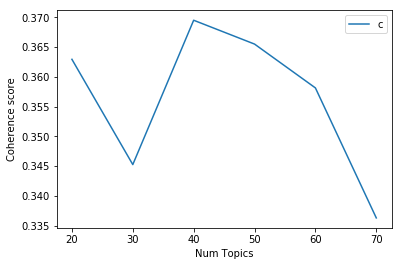

In [421]:
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

When we ran this model with 20 passes and 100 iterations, the output was *totally* different:
``` 
Num Topics = 20  has Coherence Value of 0.3629
Num Topics = 30  has Coherence Value of 0.3453
Num Topics = 40  has Coherence Value of 0.3695
Num Topics = 50  has Coherence Value of 0.3655
Num Topics = 60  has Coherence Value of 0.3581
Num Topics = 70  has Coherence Value of 0.3363
```
![](coherence_30_passes.png "Coherence graph for code run with 30 passes and 100 iterations.")


Those models took a long time to run though (about 30 minutes on my laptop!). But we can explore the results by loading the saved model here:

In [425]:
lda_model_40 = gensim.models.ldamodel.LdaModel.load('lda_40.gensim')

In [426]:
topics = lda_model_40.show_topics(num_words = 10, num_topics = 40)
for i, topic in enumerate(topics):
    print("Topic", i, "\n", topic, "\n")

Topic 0 
 (0, '0.026*"enemi" + 0.011*"lake" + 0.008*"command" + 0.006*"victori" + 0.006*"captain" + 0.006*"american" + 0.006*"warfar" + 0.005*"militia" + 0.005*"dike" + 0.005*"captur"') 

Topic 1 
 (1, '0.007*"upon" + 0.006*"law" + 0.004*"depart" + 0.004*"interest" + 0.004*"increas" + 0.004*"may" + 0.004*"offic" + 0.004*"present" + 0.004*"report" + 0.004*"american"') 

Topic 2 
 (2, '0.012*"program" + 0.009*"feder" + 0.008*"develop" + 0.007*"increas" + 0.007*"administr" + 0.006*"need" + 0.006*"propos" + 0.006*"econom" + 0.005*"effort" + 0.005*"legisl"') 

Topic 3 
 (3, '0.000*"law" + 0.000*"may" + 0.000*"public" + 0.000*"upon" + 0.000*"interest" + 0.000*"peopl" + 0.000*"american" + 0.000*"import" + 0.000*"must" + 0.000*"depart"') 

Topic 4 
 (4, '0.009*"upon" + 0.008*"necessari" + 0.008*"action" + 0.007*"law" + 0.007*"present" + 0.007*"shall" + 0.007*"public" + 0.006*"may" + 0.006*"matter" + 0.006*"commiss"') 

Topic 5 
 (5, '0.000*"peopl" + 0.000*"upon" + 0.000*"work" + 0.000*"make" +

We can look at a specific speech, to see what topics are strongly associated with it, using the dictionary .doc2bow() function.

In [427]:
bush_bow = dictionary.doc2bow(cleaned_speeches[235])
for t in lda_model_40.get_document_topics(bush_bow):
    print(t)

(12, 0.64563006)
(37, 0.35415253)


In [428]:
kennedy_bow = dictionary.doc2bow(cleaned_speeches[177])
for t in lda_model_40.get_document_topics(kennedy_bow):
    print(t)

(2, 0.2513792)
(12, 0.069251)
(26, 0.19035082)
(27, 0.3465526)
(30, 0.015602505)
(36, 0.03138153)
(37, 0.09528372)


In [429]:
washington_bow = dictionary.doc2bow(cleaned_speeches[0])
for t in lda_model_40.get_document_topics(washington_bow):
    print(t)

(18, 0.9987241)


## Visualizing topic models

There's one more cool tool we can use with gensim - pyLDAvis - to actually visualize what these topics look like, what words are associated with them, and how distant they are from each other in a vector space.

In [433]:
import pyLDAvis.gensim
lda = gensim.models.ldamodel.LdaModel.load('lda_40.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


If you create a great visualization using pyLDAvis you can save it as an html file!

In [ ]:
pyLDAvis.save_html(lda_display,'lda_viz.html')

## Acknowledgements
Some of the code, descriptions, and examples above are taken from:
* UC Berkeley's D-Lab [workshop on Text Analysis Fundamentals](https://dlab.berkeley.edu/training/text-analysis-fundamentals-unsupervised-approaches-10).
* Software Carpentry's open source [Python curriculum](http://swcarpentry.github.io/python-novice-inflammation/).
* Gensim code adapted from [towardsdatascience.com](https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21)